# LeNet Lab Solution
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)

/home/uda/.conda/envs/IntroToTensorFlow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:

X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))


print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

y_train[N] 6
X_train (55000, 28, 28, 1) <class 'tuple'> <class 'numpy.ndarray'> (28, 28, 1)
y_train (55000,) <class 'tuple'> <class 'numpy.uint8'> ()
squeeze (28, 28) <class 'numpy.ndarray'> (28, 28)
X_validation (5000, 28, 28, 1)
y_validation (5000,)
X_test (10000, 28, 28, 1)
y_test (10000,)


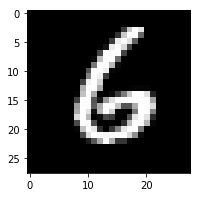

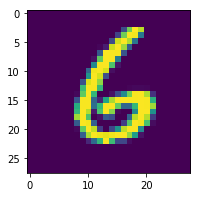

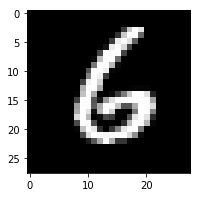

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

N=1000

im=X_train[N].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(im, cmap="gray")

plt.figure(figsize=(3,3))
plt.imshow(im)

plt.figure(figsize=(3,3))
plt.imshow(X_train[N].squeeze(), cmap="gray")

print('y_train[N]',y_train[N])

print('X_train',X_train.shape,type(X_train.shape),type(X_train[N]),X_train[N].shape)
print('y_train',y_train.shape,type(y_train.shape),type(y_train[N]),y_train[N].shape)
print('squeeze',im.shape,type(im),im.shape)

print('X_validation',X_validation.shape)
print('y_validation',y_validation.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

(28, 28, 1)
(28, 28, 1)


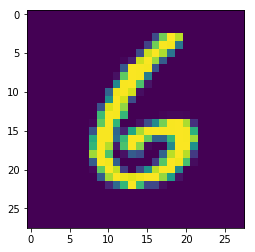

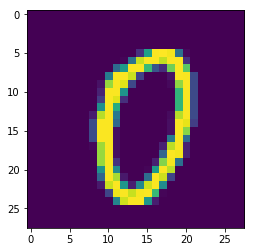

In [4]:
print(X_train[N].shape)

im=X_train[N].squeeze()
plt.figure()
plt.imshow(im)


print(X_validation[N].shape)

im=X_validation[N].squeeze()
plt.figure()
plt.imshow(im)

In [5]:
import numpy as np
#　パディングにより入力データを32x32に修正する （重要）

# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))
print('X_train',X_train .shape)
print('X_validation',X_validation .shape)
print('X_test',X_test .shape)

Updated Image Shape: (32, 32, 1)
X_train (55000, 32, 32, 1)
X_validation (5000, 32, 32, 1)
X_test (10000, 32, 32, 1)


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

0


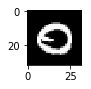

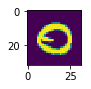

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")

plt.figure(figsize=(1,1))
plt.imshow(image)

print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [7]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [8]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [9]:
from tensorflow.contrib.layers import flatten
#①ネットワークを構築する
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6. 
    # 5x5のフィルタを適用すると幅高さ32x32→幅高さ28x28となる
    # 加えて入力深度が１，出力深度が6なので　shape=(5, 5, 1, 6)を適用する
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))  
    #出力深度が6なのでバイアスも６セット用意
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    #出力結果にreluを適用する
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    #　maxプーリングを使ってサイズを縮小する
    #　入力が[index,幅,高さ,深度]なので第0th,3thは１　1th,2thにカーネルとストライドサイズを設定
    #　ksize=[1, w, h, 1]　strides=[1, hstride, vstride, 1]
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Input = 14x14x6.　Output = 10x10x16.
    #　フィルタサイズが5x5　入力深度が6　出力深度が16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    #　5ｘ5ｘ16＝400　1次元に変換
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    #　tf.Variable(tf.Sessionのための準備)を実行
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [10]:
#ひな形を用意する

#　32ｘ32ｘ1の画像を用意（index=None :大きさを指定しない）
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))


#y(int32型ラベルデータ)を10パターン分　one_hotデータ(結果)として用意
one_hot_y = tf.one_hot(y, 10)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [11]:
#トレーニング内容を定義する

rate = 0.001
#用意したLeNet関数に入力x（32x32x1型画像を適用）
# ※※※ xはplaceholderで定義　且つ　section内の「辞書」で入力実行※※
logits = LeNet(x)
#結果をソフトマックス・クロスエントロピーに適用
########## 
#等価処理は　　　　　　　 y = tf.nn.softmax(tf.matmul(x,W) + b)
##########  cross_entropy = -tf.reduce_sum(y_*tf.log(y))

# ※※※ ｙone_hot_yはplaceholderで定義したyより生成　且つ　section内の「辞書」で入力実行※※
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

#総和平均で得点を計算
loss_operation = tf.reduce_mean(cross_entropy)

#Adam法による最急降下を選択　
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
#他最急降下法の適用例：　optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

#Adam法で評価
training_operation = optimizer.minimize(loss_operation)


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [12]:
import tensorflow as tf

#スコア評価方法を定義する

#tf.argmaxの引数
#tf.argmax（A,B)　　Aが真のデータ、Bが評価されるデータ
#行列についてはdimensionに0を指定すると、行成分についての最大値をもつ要素（列成分）の添字を返却します。
#一方dimensionに1を指定すると、列成分についての最小値を持つ要素（行成分）の添字を返却します。

#tf.equal：ベクトルが一致しているか否か　True or False　（LeNet結果とOne_Hot値）
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
#総和平均で得点を計算 →　logitsとone_hotの件数分（例：55000件)のTRUE,FALSEが戻る　全部Trueならtf.reduce_meanは100％一致と出力する
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


tf_argmax=[[tf.argmax(logits, 1)] , [tf.argmax(one_hot_y, 1)]]

####################################################
flg= tf.cast(correct_prediction, tf.int32)
accuracy_operation_custom=    tf.cast(pow(-1,flg+1) ,tf.int32) *   tf.cast(tf.argmax(logits, 1) ,tf.int32) 
#######################################################

#accuracy_operation_custom = correct_prediction


#Tensorflowの学習パラーメータのsave, restoreにはtf.train.Saverを使用
#　　→　tf.train.Saver()の引数を指定しない場合は全ての変数が保存
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    
    #変数の初期化　global_variables_initializer
    #セッション中身を元の状態に戻す（再リセット）
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

##############以降　追加のカスタムファンクション################################################
def evaluatecustom(X_data, y_data):
    sess = tf.get_default_session()
    return  sess.run(accuracy_operation_custom  , feed_dict={x:X_data, y:y_data})

def show_debug(X_data, y_data):
    
    sess = tf.get_default_session()
    print(sess.run(cross_entropy  , feed_dict={x:X_data, y:y_data}) )
    
    sess = tf.get_default_session()
    z_one_hot=sess.run(one_hot_y  , feed_dict={x:X_data, y:y_data}) 
    print('one_hot_y',z_one_hot,np.max(z_one_hot))
    
    sess = tf.get_default_session()
    zlogits=sess.run(logits  , feed_dict={x:X_data, y:y_data})
    print('logits',zlogits,np.max(zlogits) )
    
    sess = tf.get_default_session()
    zargmax=sess.run(tf_argmax  , feed_dict={x:X_data, y:y_data}) 
    print(zargmax)
    print('tf_argmax:logits',zargmax[0])
    print('tf_argmax:one_hot',zargmax[1])
    
    sess = tf.get_default_session()
    z_prediction=sess.run(correct_prediction  , feed_dict={x:X_data, y:y_data}) 
    print('correct_prediction',z_prediction)
    return



## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [13]:
#X_train訓練データ,Y_trainラベルデータを用いてモデルを作成
"""
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    ##　EPOCHS=10（パターンが数字0〜9の10種類　→　1データずつ確認）
    for i in range(EPOCHS):
        #順序依存の誤教示を排除するためシャッフルする
        X_train, y_train = shuffle(X_train, y_train)
        #55000点データをBATCH_SIZE分ずつ処理
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            
            #batchはX_train、Y_trainの抜き出し部分（実入力データ）
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            #先に定義したtraining_operation（Adam法）で入力データ[X_train,Y_train]を評価値に変換する
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
            
        #評価データX_validation, y_validation　でevaluateの実行    
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
  ##  tf.train.Saver.last_checkpoints



#saver.save(sess, './lenet')実行により
#①lenet.data-00000-of-00001②lenet.index③lenet.meta④checkpointの計４ファイルが記録される

"""

'\nwith tf.Session() as sess:\n    sess.run(tf.global_variables_initializer())\n    num_examples = len(X_train)\n    \n    print("Training...")\n    print()\n    ##\u3000EPOCHS=10（パターンが数字0〜9の10種類\u3000→\u30001データずつ確認）\n    for i in range(EPOCHS):\n        #順序依存の誤教示を排除するためシャッフルする\n        X_train, y_train = shuffle(X_train, y_train)\n        #55000点データをBATCH_SIZE分ずつ処理\n        for offset in range(0, num_examples, BATCH_SIZE):\n            end = offset + BATCH_SIZE\n            \n            #batchはX_train、Y_trainの抜き出し部分（実入力データ）\n            batch_x, batch_y = X_train[offset:end], y_train[offset:end]\n            \n            #先に定義したtraining_operation（Adam法）で入力データ[X_train,Y_train]を評価値に変換する\n            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})\n            \n            \n        #評価データX_validation, y_validation\u3000でevaluateの実行    \n        validation_accuracy = evaluate(X_validation, y_validation)\n        print("EPOCH {} ...".format(i+1))\n        print("Valid

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [14]:
#手法①　checkpointファイルで指定された定義モデルを restoreでファイルからリロードする！
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
   
    #X_test, y_testに対してevaluateの実行    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.988


In [15]:
#手法②　先に記録した定義モデルをrestoreでファイルからリロードする！
import tensorflow as tf
saver = tf.train.Saver() 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')

    #X_test, y_testに対してevaluateの実行    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.988


In [16]:
import tensorflow as tf

print(tf.train.latest_checkpoint('.'))
#結果はsaver.saveで指示した　'./lenet'


./lenet


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
saver = tf.train.Saver() 


with tf.Session() as sess:
    OK=113
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')    
    
    X_try = np.array( [X_test[OK]])
    y_try = np.array( [y_test[OK]])
    print('lbl',y_try)
    show_debug(X_try,y_try)
    
    OK=114 
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')    
    X_try = np.array( [X_test[OK]])
    y_try = np.array( [y_test[OK]])
    print('lbl',y_try)
    show_debug(X_try,y_try)

    NG=115
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')    
    X_try = np.array( [X_test[NG]])
    y_try = np.array( [y_test[NG]])
    print('lbl',y_try)
    show_debug(X_try,y_try)

INFO:tensorflow:Restoring parameters from ./lenet
lbl [9]
[  9.67932574e-05]
one_hot_y [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]] 1.0
logits [[ -5.4977951  -10.64902973  -3.14745641   3.99339271  -1.13802612
   -4.8124485  -16.14008713   0.86480272   1.73923862  13.3809948 ]] 13.381
[[array([9])], [array([9])]]
tf_argmax:logits [array([9])]
tf_argmax:one_hot [array([9])]
correct_prediction [ True]
INFO:tensorflow:Restoring parameters from ./lenet
lbl [7]
[ 0.0015359]
one_hot_y [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]] 1.0
logits [[-10.65982533   0.99044192   5.2156744    0.99247092  -5.79296827
   -9.20542049 -20.10249138  11.72268391  -4.14052629  -3.17024112]] 11.7227
[[array([7])], [array([7])]]
tf_argmax:logits [array([7])]
tf_argmax:one_hot [array([7])]
correct_prediction [ True]
INFO:tensorflow:Restoring parameters from ./lenet
lbl [4]
[ 0.99642766]
one_hot_y [[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]] 1.0
logits [[-6.20117664 -4.78960323 -3.9623642  -6.55166817  7.86302614  0

INFO:tensorflow:Restoring parameters from ./lenet
i 115
(10000, 32, 32, 1) <class 'numpy.ndarray'>
(1, 32, 32, 1)
4
[-9]


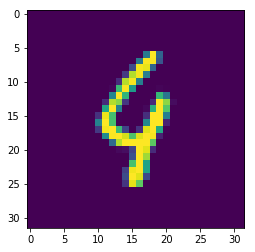

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
saver = tf.train.Saver() 
with tf.Session() as sess:
#先に記録した定義モデルをrestoreでファイルからリロードする！
    saver.restore(sess, './lenet')

    for i in range(X_test.shape[0]) : 
        X_try = np.array( [X_test[i]])
        y_try = np.array( [y_test[i]])

        n=( evaluatecustom(X_try, y_try) )
        #print(n)
        if(n<0):
            print('i',i)
            print(X_test.shape,type(X_test))
            print(X_try.shape)

            print(y_test[i])
            print(n)

            plt.figure()
            plt.imshow(X_try.squeeze())
            
            break